In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
time_series_data = pd.read_csv("data/ElectricityTimeSeriesForecast.csv")
time_series_data = time_series_data.loc[:,["Timestamp", "Building 74 - kWh Total Electricity (kWh)", "ElectricityConsumptionForecast"]]

In [6]:
time_series_data.shape

(1000, 3)

In [8]:
time_series_data.head(10)

,Timestamp,Building 74 - kWh Total Electricity (kWh),ElectricityConsumptionForecast
0,2014-01-01 00:30:00,22.8125,-1000.0
1,2014-01-01 00:45:00,24.6650,-1000.0
2,2014-01-01 01:00:00,24.1725,-1000.0
3,2014-01-01 01:15:00,24.9500,-1000.0
4,2014-01-01 01:30:00,23.6175,-1000.0
5,2014-01-01 01:45:00,23.7425,-1000.0
6,2014-01-01 02:00:00,24.7725,-1000.0
7,2014-01-01 02:15:00,23.4475,-1000.0
8,2014-01-01 02:30:00,24.4975,-1000.0
9,2014-01-01 02:45:00,24.4175,-1000.0


In [9]:
time_series_data.tail(10)

,Timestamp,Building 74 - kWh Total Electricity (kWh),ElectricityConsumptionForecast
990,2014-01-11 08:00:00,26.3275,32.408475
991,2014-01-11 08:15:00,26.5050,32.185751
992,2014-01-11 08:30:00,24.6300,32.112135
993,2014-01-11 08:45:00,26.6250,33.053808
994,2014-01-11 09:00:00,24.6250,32.286367
995,2014-01-11 09:15:00,26.7550,32.430017
996,2014-01-11 09:30:00,26.4100,32.660824
997,2014-01-11 09:45:00,28.2000,32.917637
998,2014-01-11 10:00:00,25.3625,32.592020
999,2014-01-11 10:15:00,24.3350,32.189794


In [24]:
energy_consumption_values_list = list(time_series_data["Building 74 - kWh Total Electricity (kWh)"])
previous_value_1_step_time_lag = []
previous_value_2_step_time_lag = []
previous_value_3_step_time_lag = []
previous_value_4_step_time_lag = []

In [25]:
i = 4
while i < len(energy_consumption_values_list):
    previous_value_1_step_time_lag.append(energy_consumption_values_list[i - 1])
    previous_value_2_step_time_lag.append(energy_consumption_values_list[i - 2])
    previous_value_3_step_time_lag.append(energy_consumption_values_list[i - 3])
    previous_value_4_step_time_lag.append(energy_consumption_values_list[i - 4])
    i += 1

In [26]:
time_series_data = time_series_data.iloc[4:,:]
time_series_data.insert(2, "1 Step Time Lag", previous_value_1_step_time_lag)
time_series_data.insert(3, "2 Step Time Lag", previous_value_2_step_time_lag)
time_series_data.insert(4, "3 Step Time Lag", previous_value_3_step_time_lag)
time_series_data.insert(5, "4 Step Time Lag", previous_value_4_step_time_lag)

In [73]:
time_series_data.drop("ElectricityConsumptionForecast", axis=1)

,Timestamp,Prediction,Building 74 - kWh Total Electricity (kWh),1 Step Time Lag,2 Step Time Lag,3 Step Time Lag,4 Step Time Lag
800,2014-01-09 08:30:00,30.720415,29.0775,30.9900,29.7825,31.9650,30.8100
801,2014-01-09 08:45:00,29.745568,31.2975,29.0775,30.9900,29.7825,31.9650
802,2014-01-09 09:00:00,30.498727,32.2925,31.2975,29.0775,30.9900,29.7825
803,2014-01-09 09:15:00,31.267675,30.5875,32.2925,31.2975,29.0775,30.9900
804,2014-01-09 09:30:00,30.800578,31.5900,30.5875,32.2925,31.2975,29.0775
805,2014-01-09 09:45:00,31.284160,30.2850,31.5900,30.5875,32.2925,31.2975
806,2014-01-09 10:00:00,30.638816,30.4175,30.2850,31.5900,30.5875,32.2925
807,2014-01-09 10:15:00,30.457154,31.5925,30.4175,30.2850,31.5900,30.5875
808,2014-01-09 10:30:00,30.960457,33.8700,31.5925,30.4175,30.2850,31.5900
809,2014-01-09 10:45:00,32.289212,34.7425,33.8700,31.5925,30.4175,30.2850


In [27]:
time_series_data.head(10)

,Timestamp,Building 74 - kWh Total Electricity (kWh),1 Step Time Lag,2 Step Time Lag,3 Step Time Lag,4 Step Time Lag,ElectricityConsumptionForecast
4,2014-01-01 01:30:00,23.6175,24.9500,24.1725,24.6650,22.8125,-1000.0
5,2014-01-01 01:45:00,23.7425,23.6175,24.9500,24.1725,24.6650,-1000.0
6,2014-01-01 02:00:00,24.7725,23.7425,23.6175,24.9500,24.1725,-1000.0
7,2014-01-01 02:15:00,23.4475,24.7725,23.7425,23.6175,24.9500,-1000.0
8,2014-01-01 02:30:00,24.4975,23.4475,24.7725,23.7425,23.6175,-1000.0
9,2014-01-01 02:45:00,24.4175,24.4975,23.4475,24.7725,23.7425,-1000.0
10,2014-01-01 03:00:00,24.0475,24.4175,24.4975,23.4475,24.7725,-1000.0
11,2014-01-01 03:15:00,23.0850,24.0475,24.4175,24.4975,23.4475,-1000.0
12,2014-01-01 03:30:00,23.7750,23.0850,24.0475,24.4175,24.4975,-1000.0
13,2014-01-01 03:45:00,24.9625,23.7750,23.0850,24.0475,24.4175,-1000.0


In [34]:
X = time_series_data.iloc[:,2:6]
y = time_series_data.iloc[:,1]

In [57]:
cut_off_value = int(0.8 * time_series_data.shape[0])
X_train = X.iloc[0:cut_off_value,]
X_test = X.iloc[cut_off_value:,]
y_train = y.iloc[0:cut_off_value,]
y_test = y.iloc[cut_off_value:,]

In [58]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

2.359544207002953
0.8493762827425856


In [59]:
lasso_regression_model = Lasso()
lasso_regression_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

2.359544207002953
0.8493762827425856


In [60]:
ridge_regression_model = Ridge()
ridge_regression_model.fit(X_train, y_train)
y_pred = ridge_regression_model.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

2.359506530167243
0.8493786878787268


In [62]:
prediction_values = [0 for i in range(time_series_data.shape[0])]

In [63]:
i = len(prediction_values) - 1
j = len(y_pred) - 1

while j >= 0:
    prediction_values[i] = y_pred[j] 
    i -= 1
    j -= 1

In [65]:
time_series_data["Prediction"] = prediction_values

In [70]:
time_series_data = time_series_data[time_series_data["Prediction"] != 0]

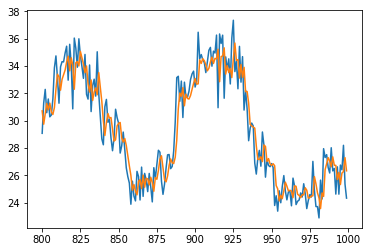

In [71]:
plt.plot('Building 74 - kWh Total Electricity (kWh)', data=time_series_data)
plt.plot('Prediction', data=time_series_data)